In [356]:
import re #used to work with Regular Expressions
import pandas as pd #used for working with data sets
import numpy as np #used to create arrays or matrices
import matplotlib.pyplot as plt #used to create 2D graphs and plots by using python scripts
import seaborn as sns #data visualization library based on matplotlib
import string #contains some constants, utility function, and classes for string manipulation
import nltk #natural language toolkit
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) #to ignore warnings
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
#tells the Python environment to draw the plots immediately after the current cell

In [357]:
train_df = pd.read_csv(r'C:\Users\Inchara\Downloads\SAoSMP\Data-Files\train gaming.csv') #train_tweets.csv #change here
print(train_df.shape)
train_df.head()

(1000, 3)


id  label                                              tweet
0   1      1                           Wow... Loved this place.
1   2      0                                 Crust is not good.
2   3      0          Not tasty and the texture was just nasty.
3   4      1  Stopped by during the late May bank holiday of...
4   5      1  The selection on the menu was great and so wer...

In [358]:
train_df['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

 ## Data Pre-Processing

### 1) Removing Twitter Handles (@user)


In [359]:
def remove_pattern(text,pattern):

    # re.findall() finds the pattern i.e @user and puts it in a list for further task #re->regex
    r = re.findall(pattern,text)
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
        text = re.sub('https?://\S+|www\.\S+', '', text)
    return text

In [360]:
train_df['Tidy_Tweets'] = np.vectorize(remove_pattern)(train_df['tweet'], "@[a-zA-Z]*") #" \w " means "any word character" which usually means alphanumeric (letters, numbers, regardless of case) plus underscore (_);
train_df.head()

id  label                                              tweet  \
0   1      1                           Wow... Loved this place.   
1   2      0                                 Crust is not good.   
2   3      0          Not tasty and the texture was just nasty.   
3   4      1  Stopped by during the late May bank holiday of...   
4   5      1  The selection on the menu was great and so wer...   

                                         Tidy_Tweets  
0                           Wow... Loved this place.  
1                                 Crust is not good.  
2          Not tasty and the texture was just nasty.  
3  Stopped by during the late May bank holiday of...  
4  The selection on the menu was great and so wer...

### 2) Removing Punctuations, Numbers, and Special Characters


In [361]:
train_df['Tidy_Tweets'] = train_df['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ") #match all strings that contain a non-letter
train_df.head()

C:\Users\Inchara\AppData\Local\Temp\ipykernel_22452\2517922774.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['Tidy_Tweets'] = train_df['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ") #match all strings that contain a non-letter


id  label                                              tweet  \
0   1      1                           Wow... Loved this place.   
1   2      0                                 Crust is not good.   
2   3      0          Not tasty and the texture was just nasty.   
3   4      1  Stopped by during the late May bank holiday of...   
4   5      1  The selection on the menu was great and so wer...   

                                         Tidy_Tweets  
0                           Wow    Loved this place   
1                                 Crust is not good   
2          Not tasty and the texture was just nasty   
3  Stopped by during the late May bank holiday of...  
4  The selection on the menu was great and so wer...

### 3) Removing Short Words

In [362]:
train_df['Tidy_Tweets'] = train_df['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
train_df.head()

id  label                                              tweet  \
0   1      1                           Wow... Loved this place.   
1   2      0                                 Crust is not good.   
2   3      0          Not tasty and the texture was just nasty.   
3   4      1  Stopped by during the late May bank holiday of...   
4   5      1  The selection on the menu was great and so wer...   

                                         Tidy_Tweets  
0                                   Loved this place  
1                                         Crust good  
2                           tasty texture just nasty  
3  Stopped during late bank holiday Rick Steve re...  
4                   selection menu great were prices

## Data visualisation

### 1) WordCloud

In [363]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image #Python Imaging Library (PIL)
import urllib #collects several modules for working with URLs
import requests

In [364]:
all_words_positive = ' '.join(text for text in train_df['Tidy_Tweets'][train_df['label']==1])

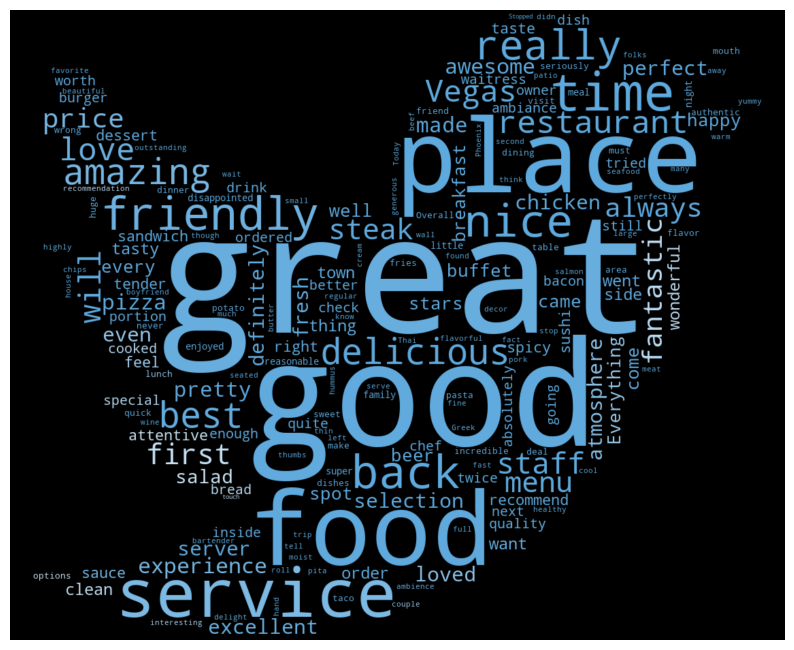

In [365]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="bilinear")

plt.axis('off')
plt.show()

In [366]:
all_words_negative = ' '.join(text for text in train_df['Tidy_Tweets'][train_df['label']==0])

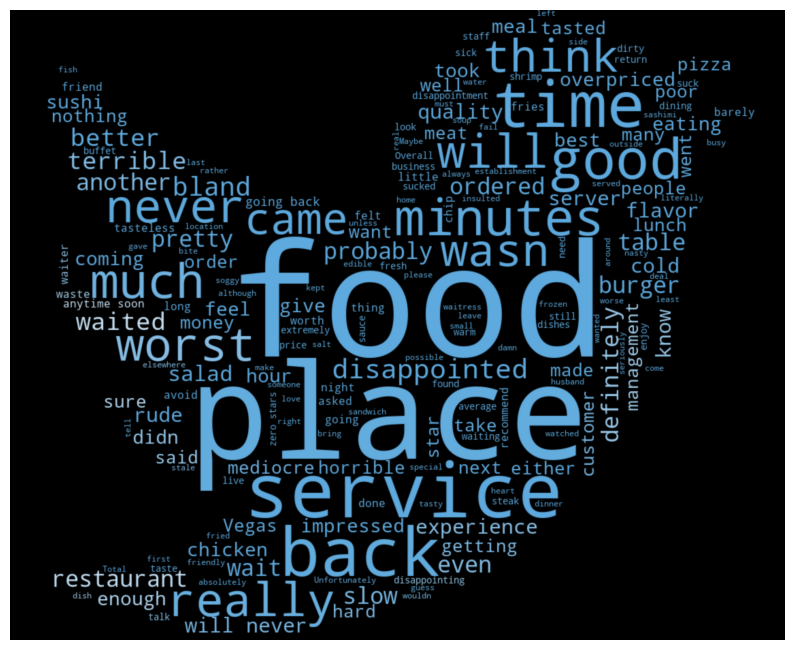

In [367]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

### 2) Bar Graphs

In [368]:
def create_bar_graph(word_frequencies, top_n=10):
    # Sort the word frequencies by their counts
    sorted_word_freq = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)
    
    # Extract the top N words and their frequencies
    top_words = [word[0] for word in sorted_word_freq[:top_n]]
    top_counts = [word[1] for word in sorted_word_freq[:top_n]]
    
    # Create the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


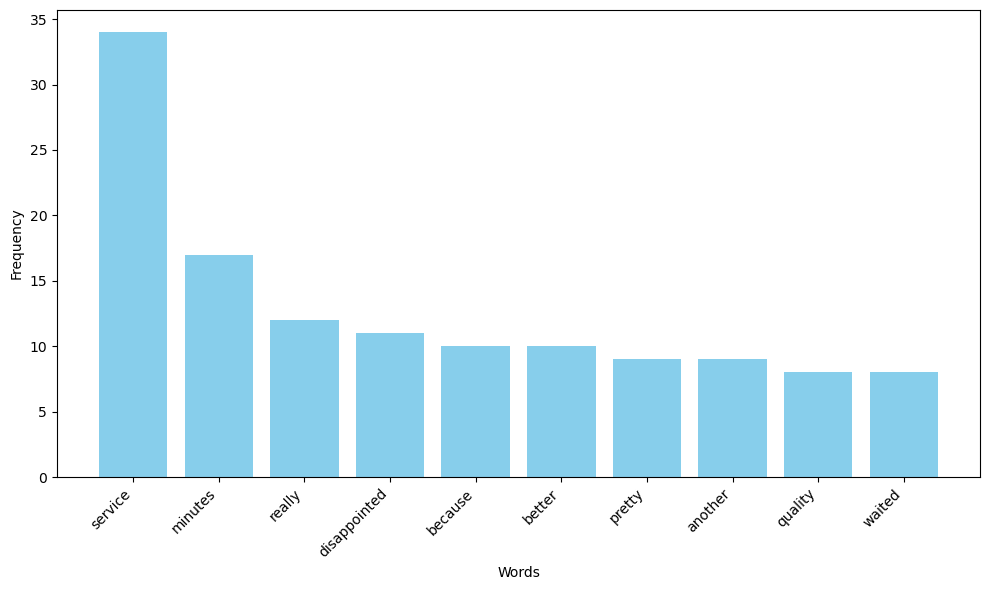

In [369]:
from collections import Counter

# Count word frequencies in all_words_negative
word_freq_negative = Counter(word for word in all_words_negative.split() if len(word) > 5)

# Create a bar graph using the function created earlier
create_bar_graph(word_freq_negative, top_n=10)


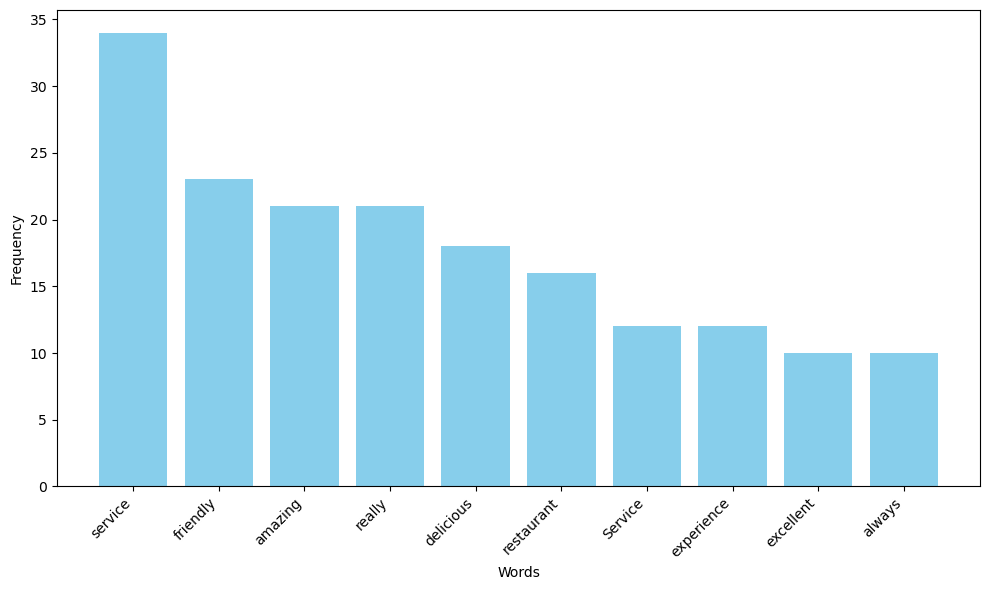

In [370]:
from collections import Counter

# Count word frequencies in all_words_negative
word_freq_positive = Counter(word for word in all_words_positive.split() if len(word) > 5)

# Create a bar graph using the function created earlier
create_bar_graph(word_freq_positive, top_n=10)

## Selecting suitable ML model

### Extracting Features from cleaned Tweets

#### 1) Bag-of-Words Features

In [371]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(train_df['Tidy_Tweets'])
train_bow = bow[:train_df.shape[0]]
df_bow = pd.DataFrame(bow.todense())
df_bow

0    1    2    3    4    5    6    7    8    9    ...  578  579  580  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     581  582  583  584  585  586  587  
0      0    0    0    0    0    0    0  
1      0    0    0    0    0    0    0  
2      0    0    0    0    0    0    0  
3      0    0    0    0    0    0    0  
4      0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
995    0    0    0    0    0    0    0  
996    0    0    0    0    0    0    0  
997    0    0    0    0    0    0    0  
998    0    0    0    0    0    0    0  
999    0    0    0    0    0    0    0  

[1000 rows x 588 columns]

In [372]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train_df['label'],test_size=0.3,random_state=2)

#### 2) TF-IDF Features

In [373]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(train_df['Tidy_Tweets'])
train_tfidf_matrix = tfidf_matrix[:train_df.shape[0]]
df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

0    1    2    3    4    5    6    7    8    9    ...  578  579  580  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     581  582  583  584  585  586  587  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  
995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1000 rows x 588 columns]

In [374]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train_df['label'],test_size=0.3,random_state=17)

### Using all the main ML Classifier Algorithms

#### **1) LogisticRegression**

In [375]:
from sklearn.linear_model import LogisticRegression
lr_clf1 = LogisticRegression(random_state = 0)
lr_clf1.fit(x_train_bow, y_train_bow)

LogisticRegression(random_state=0)

In [376]:
lr_clf_Train_acc1= lr_clf1.score(x_train_bow,y_train_bow)
lr_clf_Test_acc1= lr_clf1.score(x_valid_bow,y_valid_bow)

In [377]:
print('Accuracy on training set:',lr_clf_Train_acc1)
print('Accuracy on test set:',lr_clf_Test_acc1)

Accuracy on training set: 0.9228571428571428
Accuracy on test set: 0.7833333333333333


In [378]:
from sklearn.linear_model import LogisticRegression
lr_clf2 = LogisticRegression(random_state = 0)
lr_clf2.fit(x_train_tfidf, y_train_tfidf)

LogisticRegression(random_state=0)

In [379]:
lr_clf_Train_acc2= lr_clf2.score(x_train_tfidf,y_train_tfidf)
lr_clf_Test_acc2= lr_clf2.score(x_valid_tfidf,y_valid_tfidf)

In [380]:
print('Accuracy on training set:',lr_clf_Train_acc2)
print('Accuracy on test set:',lr_clf_Test_acc2)

Accuracy on training set: 0.9171428571428571
Accuracy on test set: 0.7366666666666667


#### **2) Naive Bayes Classifier**

In [381]:
x_train_bow1=x_train_bow.toarray()
x_valid_bow1=x_valid_bow.toarray()
x_train_tfidf1=x_train_tfidf.toarray()
x_valid_tfidf1=x_valid_tfidf.toarray()

In [382]:
from sklearn.naive_bayes import GaussianNB
nb_clf1= GaussianNB()
nb_clf1.fit(x_train_bow1, y_train_bow)

GaussianNB()

In [383]:
nb_clf_Train_acc1=nb_clf1.score(x_train_bow1,y_train_bow)
nb_clf_Test_acc1=nb_clf1.score(x_valid_bow1,y_valid_bow)

In [384]:
print('Accuracy on training set:',nb_clf_Train_acc1)
print('Accuracy on test set:',nb_clf_Test_acc1)

Accuracy on training set: 0.8228571428571428
Accuracy on test set: 0.69


In [385]:
from sklearn.naive_bayes import GaussianNB
nb_clf2= GaussianNB()
nb_clf2.fit(x_train_tfidf1, y_train_tfidf)

GaussianNB()

In [386]:
nb_clf_Train_acc2=nb_clf2.score(x_train_tfidf1,y_train_tfidf)
nb_clf_Test_acc2=nb_clf2.score(x_valid_tfidf1,y_valid_tfidf)

In [387]:
print('Accuracy on training set:',nb_clf_Train_acc2)
print('Accuracy on test set:',nb_clf_Test_acc2)

Accuracy on training set: 0.8785714285714286
Accuracy on test set: 0.67


#### **3) RandomForest Classifier**

In [388]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_clf1.fit(x_train_bow, y_train_bow)

RandomForestClassifier(n_estimators=10, random_state=0)

In [389]:
rf_clf_Train_acc1 = rf_clf1.score(x_train_bow,y_train_bow)
rf_clf_Test_acc1=rf_clf1.score(x_valid_bow,y_valid_bow)

In [390]:
print('Accuracy on training set:',rf_clf_Train_acc1)
print('Accuracy on test set:',rf_clf_Test_acc1)

Accuracy on training set: 0.97
Accuracy on test set: 0.76


In [391]:
from sklearn.ensemble import RandomForestClassifier
rf_clf2 = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_clf2.fit(x_train_tfidf, y_train_tfidf)

RandomForestClassifier(n_estimators=10, random_state=0)

In [392]:
rf_clf_Train_acc2 = rf_clf2.score(x_train_tfidf,y_train_tfidf)
rf_clf_Test_acc2=rf_clf2.score(x_valid_tfidf,y_valid_tfidf)

In [393]:
print('Accuracy on training set:',rf_clf_Train_acc2)
print('Accuracy on test set:',rf_clf_Test_acc2)

Accuracy on training set: 0.9742857142857143
Accuracy on test set: 0.7066666666666667


#### **4) DecisionTree Classifier**

In [394]:
from sklearn.tree import DecisionTreeClassifier
dec_clf1 = DecisionTreeClassifier()
dec_clf1.fit(x_train_bow, y_train_bow)

DecisionTreeClassifier()

In [395]:
dec_clf_Train_acc1=dec_clf1.score(x_train_bow, y_train_bow)
dec_clf_Test_acc1=dec_clf1.score(x_valid_bow, y_valid_bow)

In [396]:
print('Accuracy on training set:', dec_clf_Train_acc1)
print('Accuracy on test set:',dec_clf_Test_acc1)

Accuracy on training set: 0.9828571428571429
Accuracy on test set: 0.6533333333333333


In [397]:
from sklearn.tree import DecisionTreeClassifier
dec_clf2 = DecisionTreeClassifier()
dec_clf2.fit(x_train_tfidf, y_train_tfidf)

DecisionTreeClassifier()

In [398]:
dec_clf_Train_acc2=dec_clf2.score(x_train_tfidf, y_train_tfidf)
dec_clf_Test_acc2=dec_clf2.score(x_valid_tfidf, y_valid_tfidf)

In [399]:
print('Accuracy on training set:', dec_clf_Train_acc2)
print('Accuracy on test set:',dec_clf_Test_acc2)

Accuracy on training set: 0.99
Accuracy on test set: 0.7033333333333334


#### **5) k-NN Classifier**

In [400]:
knn_clf1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_clf1.fit(x_train_bow, y_train_bow)

KNeighborsClassifier()

In [401]:
kNN_Train_acc1=knn_clf1.score(x_train_bow,y_train_bow)
kNN_Test_acc1=knn_clf1.score(x_valid_bow,y_valid_bow)

In [402]:
print('Accuracy on training set:',kNN_Train_acc1)
print('Accuracy on test set:',kNN_Test_acc1)

Accuracy on training set: 0.7571428571428571
Accuracy on test set: 0.6466666666666666


In [403]:
knn_clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_clf2.fit(x_train_tfidf, y_train_tfidf)

KNeighborsClassifier()

In [404]:
kNN_Train_acc2=knn_clf2.score(x_train_tfidf,y_train_tfidf)
kNN_Test_acc2=knn_clf2.score(x_valid_tfidf,y_valid_tfidf)

In [405]:
print('Accuracy on training set:',kNN_Train_acc2)
print('Accuracy on test set:',kNN_Test_acc2)

Accuracy on training set: 0.6742857142857143
Accuracy on test set: 0.5566666666666666


#### **6) Support Vector Classifier**

In [406]:
from sklearn.svm import SVC
svc_clf1 = SVC(kernel = 'rbf', random_state = 0)
svc_clf1.fit(x_train_bow, y_train_bow)

SVC(random_state=0)

In [407]:
svc_Train_acc1=svc_clf1.score(x_train_bow,y_train_bow)
svc_Test_acc1=svc_clf1.score(x_valid_bow,y_valid_bow)

In [408]:
print('Accuracy on training set:',svc_Train_acc1)
print('Accuracy on test set:', svc_Test_acc1)

Accuracy on training set: 0.9471428571428572
Accuracy on test set: 0.7766666666666666


In [409]:
from sklearn.svm import SVC
svc_clf2 = SVC(kernel = 'rbf', random_state = 0)
svc_clf2.fit(x_train_tfidf, y_train_tfidf)

SVC(random_state=0)

In [410]:
svc_Train_acc2=svc_clf2.score(x_train_tfidf,y_train_tfidf)
svc_Test_acc2=svc_clf2.score(x_valid_tfidf,y_valid_tfidf)

In [411]:
print('Accuracy on training set:',svc_Train_acc2)
print('Accuracy on test set:', svc_Test_acc2)

Accuracy on training set: 0.9814285714285714
Accuracy on test set: 0.74


### Finalizing a classification model based on performance

In [412]:
df1 = pd.DataFrame({
    'ML Algorithm': ['LRC_with_BOW','LRC_with_TFIDF','NBC_with_BOW','NBC_with_TF_IDF','RFC_with_BOW','RFC_with_TFIDF', 'DTC_with_BOW', 'DTC_with_TFIDF', 'k-NN_with_BOW', 'k-NN_with_TFIDF', 'SVC_with_BOW','SVC_with_TFIDF'],
    'Train_acc': [lr_clf_Train_acc1, lr_clf_Train_acc2, nb_clf_Train_acc1, nb_clf_Train_acc2, rf_clf_Train_acc1, rf_clf_Train_acc2, dec_clf_Train_acc1, dec_clf_Train_acc2, kNN_Train_acc1, kNN_Train_acc2, svc_Train_acc1, svc_Train_acc2],
    'Test_acc': [lr_clf_Test_acc1, lr_clf_Test_acc2, nb_clf_Test_acc1, nb_clf_Test_acc2, rf_clf_Test_acc1, rf_clf_Test_acc2, dec_clf_Test_acc1, dec_clf_Test_acc2, kNN_Test_acc1, kNN_Test_acc2, svc_Test_acc1, svc_Test_acc2]})

df1

ML Algorithm  Train_acc  Test_acc
0      LRC_with_BOW   0.922857  0.783333
1    LRC_with_TFIDF   0.917143  0.736667
2      NBC_with_BOW   0.822857  0.690000
3   NBC_with_TF_IDF   0.878571  0.670000
4      RFC_with_BOW   0.970000  0.760000
5    RFC_with_TFIDF   0.974286  0.706667
6      DTC_with_BOW   0.982857  0.653333
7    DTC_with_TFIDF   0.990000  0.703333
8     k-NN_with_BOW   0.757143  0.646667
9   k-NN_with_TFIDF   0.674286  0.556667
10     SVC_with_BOW   0.947143  0.776667
11   SVC_with_TFIDF   0.981429  0.740000

In [413]:
algo=['LRC_BOW_test','LRC_TFIDF_test','NBC_BOW_test','NBC_TF_IDF_test','RFC_BOW_test', 'RFC_TFIDF_test','DTC_BOW_test','DTC_TFIDF_test','kNN_BOW_test','kNN_TFIDF_test','SVC_BOW_test','SVC_TFIDF_test']
accuracy =[lr_clf_Test_acc1,lr_clf_Test_acc2,nb_clf_Test_acc1,nb_clf_Test_acc2,rf_clf_Test_acc1,rf_clf_Test_acc2,dec_clf_Test_acc1,dec_clf_Test_acc2,kNN_Test_acc1,kNN_Test_acc2,svc_Test_acc1,svc_Test_acc2]

compare=pd.DataFrame({'Model':algo,'Accuracy':accuracy},index=[i for i in range(1,13)])
compare.T

1               2             3                4   \
Model     LRC_BOW_test  LRC_TFIDF_test  NBC_BOW_test  NBC_TF_IDF_test   
Accuracy      0.783333        0.736667          0.69             0.67   

                    5               6             7               8   \
Model     RFC_BOW_test  RFC_TFIDF_test  DTC_BOW_test  DTC_TFIDF_test   
Accuracy          0.76        0.706667      0.653333        0.703333   

                    9               10            11              12  
Model     kNN_BOW_test  kNN_TFIDF_test  SVC_BOW_test  SVC_TFIDF_test  
Accuracy      0.646667        0.556667      0.776667            0.74

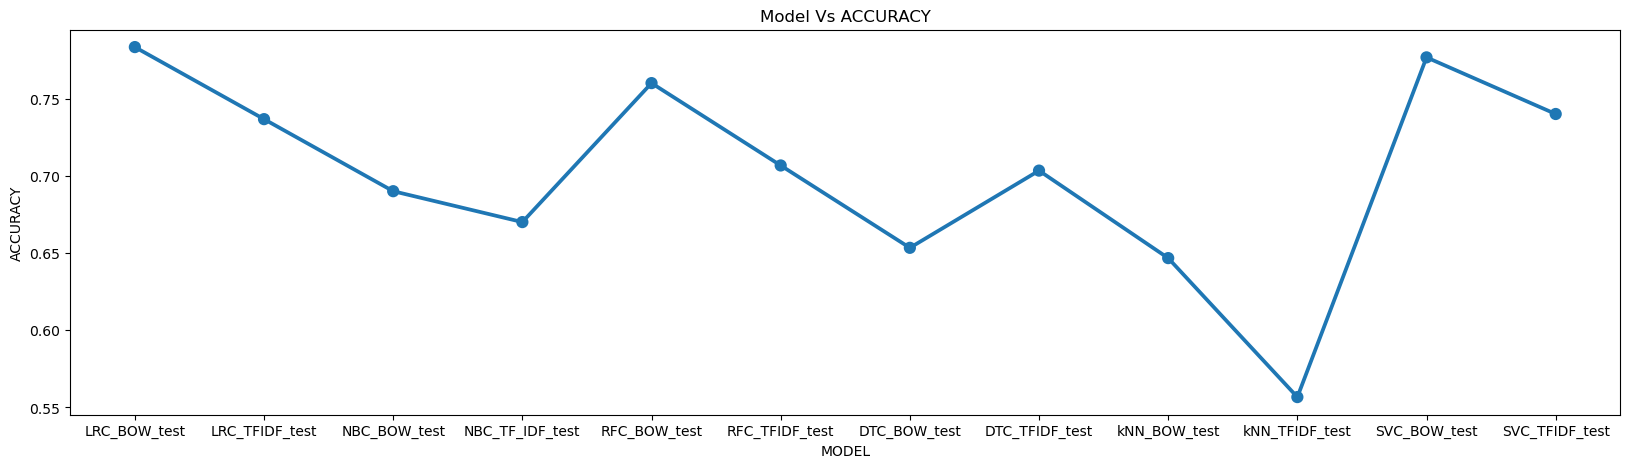

In [414]:
plt.figure(figsize=(20,5))

sns.pointplot(x='Model',y='Accuracy',data=compare)

plt.title('Model Vs ACCURACY')
plt.xlabel('MODEL')
plt.ylabel('ACCURACY')

plt.show()

# Sentiment prediction in customer data

In [415]:
cust_df = pd.read_csv(r'C:\Users\Inchara\Downloads\SAoSMP\Customer_tweets\cust gaming.csv') #customer_tweets #change here
print(cust_df.shape)
cust_df.head()

(110, 2)


id                                              tweet
0   1  best garlic mushroom white sauce pizza ever! m...
1   2  Walk-in dine-in.  Pizza can be ordered by the ...
2   3  Four and a half. I knocked the 1/2 star becaus...
3   4  Spinach & garlic pizza (light on the garlic wi...
4   5  I have to say them at this may be the best tas...

In [416]:
combine_df = pd.concat([train_df, cust_df])
print(combine_df.shape)
print(combine_df["label"].value_counts())


(1110, 4)
1.0    500
0.0    500
Name: label, dtype: int64


In [417]:
combine_df

id  label                                              tweet  \
0      1    1.0                           Wow... Loved this place.   
1      2    0.0                                 Crust is not good.   
2      3    0.0          Not tasty and the texture was just nasty.   
3      4    1.0  Stopped by during the late May bank holiday of...   
4      5    1.0  The selection on the menu was great and so wer...   
..   ...    ...                                                ...   
105  106    NaN  Omg I came craving for sausage on pizza. They ...   
106  107    NaN  Can't find any place on the island that unders...   
107  108    NaN  TomatoesGotta love a place where it's full of ...   
108  109    NaN  We ordered for NYE and one pie wasn't cooked t...   
109  110    NaN  This is the best pizza on Oahu, hands down. Pi...   

                                           Tidy_Tweets  
0                                     Loved this place  
1                                           Crust good  
2                             tasty texture just nasty  
3    Stopped during late bank holiday Rick Steve re...  
4                     selection menu great were prices  
..                                                 ...  
105                                                NaN  
106                                                NaN  
107                                                NaN  
108                                                NaN  
109                                                NaN  

[1110 rows x 4 columns]

## Data Preprocessing

In [418]:
def remove_pattern(text,pattern):

    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)

    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
        text = re.sub('https?://\S+|www\.\S+', '', text)
    return text

In [419]:
combine_df['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine_df['tweet'], "@[a-zA-Z]*")

combine_df.head()

id  label                                              tweet  \
0   1    1.0                           Wow... Loved this place.   
1   2    0.0                                 Crust is not good.   
2   3    0.0          Not tasty and the texture was just nasty.   
3   4    1.0  Stopped by during the late May bank holiday of...   
4   5    1.0  The selection on the menu was great and so wer...   

                                         Tidy_Tweets  
0                           Wow... Loved this place.  
1                                 Crust is not good.  
2          Not tasty and the texture was just nasty.  
3  Stopped by during the late May bank holiday of...  
4  The selection on the menu was great and so wer...

In [420]:
combine_df['Tidy_Tweets'] = combine_df['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

combine_df.head()

C:\Users\Inchara\AppData\Local\Temp\ipykernel_22452\2394203510.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine_df['Tidy_Tweets'] = combine_df['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")


id  label                                              tweet  \
0   1    1.0                           Wow... Loved this place.   
1   2    0.0                                 Crust is not good.   
2   3    0.0          Not tasty and the texture was just nasty.   
3   4    1.0  Stopped by during the late May bank holiday of...   
4   5    1.0  The selection on the menu was great and so wer...   

                                         Tidy_Tweets  
0                           Wow    Loved this place   
1                                 Crust is not good   
2          Not tasty and the texture was just nasty   
3  Stopped by during the late May bank holiday of...  
4  The selection on the menu was great and so wer...

In [421]:
combine_df['Tidy_Tweets'] = combine_df['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine_df.head()

id  label                                              tweet  \
0   1    1.0                           Wow... Loved this place.   
1   2    0.0                                 Crust is not good.   
2   3    0.0          Not tasty and the texture was just nasty.   
3   4    1.0  Stopped by during the late May bank holiday of...   
4   5    1.0  The selection on the menu was great and so wer...   

                                         Tidy_Tweets  
0                                   Loved this place  
1                                         Crust good  
2                           tasty texture just nasty  
3  Stopped during late bank holiday Rick Steve re...  
4                   selection menu great were prices

In [422]:
max_algm=max(accuracy)
a=accuracy.index(max_algm)
print(a,max_algm)
if a==0:
    algm=lr_clf1
elif a==1:
    algm=lr_clf2
elif a==2:
    algm=nb_clf1
elif a==3:
    algm=nb_clf2
elif a==4:
    algm=rf_clf1
elif a==5:
    algm=rf_clf2
elif a==6:
    algm=dec_clf1
elif a==7:
    algm=dec_clf2
elif a==8:
    algm=knn_clf1
elif a==9:
    algm=knn_clf2
elif a==10:
    algm=svc_clf1
else:
    algm=svc_clf2
predictions1 = algm.predict(x_valid_tfidf)

0 0.7833333333333333


In [423]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid_tfidf, predictions1))
print(classification_report(y_valid_tfidf,predictions1))

[[137   6]
 [ 39 118]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       143
           1       0.95      0.75      0.84       157

    accuracy                           0.85       300
   macro avg       0.87      0.85      0.85       300
weighted avg       0.87      0.85      0.85       300



In [424]:
cust_tfidf = tfidf_matrix[:cust_df.shape[0]]
print(cust_df.shape[0])

110


In [425]:
cust_pred = algm.predict(cust_tfidf)
print("Length of cust_pred:", len(cust_pred))
print("Length of cust_df:", len(cust_df))

cust_df['label'] = cust_pred
cust_df['Pred_Value'] = cust_df['label'].map({0: 'negative', 1: 'positive'})
submission = cust_df[['id', 'tweet', 'label', 'Pred_Value']]
submission.to_csv(r"C:\Users\Inchara\Downloads\SAoSMP\Output-Files\Customer_Tweets_with_Predicted_Values.csv", index = False) #Customer_Tweets_with_Predicted_Values

Length of cust_pred: 110
Length of cust_df: 110


In [426]:
import pickle
file = r'C:\Users\Inchara\Downloads\SAoSMP\Pickle-File\pickle.pkl'
with open(file, 'wb') as f:
    pickle.dump(svc_clf2, f)